# 장애인콜택시 대기시간 예측
## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝 
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고, 
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다. 
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [1721]:
# path = 'C:/Users/User/project/'

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1722]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1723]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [1724]:
# !pip install -r requirements.txt

#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [1725]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

### (3) 데이터 불러오기
* 주어진 데이터셋
    * [2.탐색적 데이터분석] 단계에서 저장한 파일 : data2.pkl


In [1726]:
data2 = joblib.load('data2 2.pkl')
#data2 = joblib.load('data2_with_weather 2.pkl')

In [1727]:
data2.head(10)

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season
0,2015-01-01,23.2,1023,924,NaN,0.903226,1.0,Winter
1,2015-01-02,17.2,3158,2839,NaN,0.898987,0.0,Winter
2,2015-01-03,26.2,1648,1514,NaN,0.918689,0.0,Winter
3,2015-01-04,24.5,1646,1526,NaN,0.927096,0.0,Winter
4,2015-01-05,26.2,4250,3730,NaN,0.877647,0.0,Winter
5,2015-01-06,23.6,3991,3633,NaN,0.910298,0.0,Winter
6,2015-01-07,24.7,4085,3676,23.657143,0.899878,0.0,Winter
7,2015-01-08,21.2,4030,3728,23.371429,0.925062,0.0,Winter
8,2015-01-09,21.8,4167,3813,24.028571,0.915047,0.0,Winter
9,2015-01-10,41.2,1916,1645,26.171429,0.858559,0.0,Winter


In [1728]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2922 non-null   datetime64[ns]
 1   AVG_Waited     2922 non-null   float64       
 2   Received       2922 non-null   int64         
 3   Boarded        2922 non-null   int64         
 4   Rolling_Mean   2916 non-null   float64       
 5   Boarding_rate  2922 non-null   float64       
 6   holiday        2922 non-null   float64       
 7   season         2922 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 162.8 KB


In [1729]:
# 결측치 개수
data2.isnull().sum()

Date             0
AVG_Waited       0
Received         0
Boarded          0
Rolling_Mean     6
Boarding_rate    0
holiday          0
season           0
dtype: int64

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [1730]:
data2 = data2.loc[6:].reset_index(drop=True)

In [1731]:
data2.head()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season
0,2015-01-07,24.7,4085,3676,23.657143,0.899878,0.0,Winter
1,2015-01-08,21.2,4030,3728,23.371429,0.925062,0.0,Winter
2,2015-01-09,21.8,4167,3813,24.028571,0.915047,0.0,Winter
3,2015-01-10,41.2,1916,1645,26.171429,0.858559,0.0,Winter
4,2015-01-11,28.8,1700,1572,26.785714,0.924706,0.0,Winter


In [1732]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
data2

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season
0,2015-01-07,24.7,4085,3676,23.657143,0.899878,0.0,Winter
1,2015-01-08,21.2,4030,3728,23.371429,0.925062,0.0,Winter
2,2015-01-09,21.8,4167,3813,24.028571,0.915047,0.0,Winter
3,2015-01-10,41.2,1916,1645,26.171429,0.858559,0.0,Winter
4,2015-01-11,28.8,1700,1572,26.785714,0.924706,0.0,Winter
...,...,...,...,...,...,...,...,...
2911,2022-12-26,39.2,5555,4605,43.485714,0.828983,0.0,Winter
2912,2022-12-27,44.4,5635,4654,42.771429,0.825909,0.0,Winter
2913,2022-12-28,44.8,5654,4648,43.514286,0.822073,0.0,Winter
2914,2022-12-29,52.5,5250,4247,42.957143,0.808952,0.0,Winter


In [1733]:
data2.describe()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday
count,2916,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000,2916.000000
mean,2019-01-02 20:14:19.259259392,40.337037,3928.127229,3285.638546,40.316706,0.841435,0.040809
min,2015-01-07 00:00:00,17.600000,527.000000,462.000000,18.800000,0.596996,0.000000
25%,2017-01-04 18:00:00,29.700000,2163.500000,1779.000000,31.296429,0.805897,0.000000
50%,2019-01-02 12:00:00,38.250000,4722.500000,3935.000000,39.042857,0.845545,0.000000
75%,2020-12-31 06:00:00,48.700000,5110.000000,4241.250000,47.007143,0.877657,0.000000
max,2022-12-30 00:00:00,96.100000,6182.000000,5189.000000,83.928571,0.968844,1.000000
std,NaN,14.094318,1509.300543,1248.972391,12.032292,0.052143,0.197882


### (2) 가변수화

In [1734]:
dum_cols = ['season']
#dum_cols = ['month', 'season', 'year', 'weekday']

data2 = pd.get_dummies(data2, columns = dum_cols, drop_first = True, dtype = int)

data2.head()

,Date,AVG_Waited,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season_Summer,season_Fall,season_Winter
0,2015-01-07,24.7,4085,3676,23.657143,0.899878,0.0,0,0,1
1,2015-01-08,21.2,4030,3728,23.371429,0.925062,0.0,0,0,1
2,2015-01-09,21.8,4167,3813,24.028571,0.915047,0.0,0,0,1
3,2015-01-10,41.2,1916,1645,26.171429,0.858559,0.0,0,0,1
4,2015-01-11,28.8,1700,1572,26.785714,0.924706,0.0,0,0,1


### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

#### 1) x, y 나누기

In [1735]:
target='AVG_Waited'
#target='avg_wait_time'

x = data2.drop(target, axis=1)
y = data2[target]

In [1736]:
x.head()

,Date,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season_Summer,season_Fall,season_Winter
0,2015-01-07,4085,3676,23.657143,0.899878,0.0,0,0,1
1,2015-01-08,4030,3728,23.371429,0.925062,0.0,0,0,1
2,2015-01-09,4167,3813,24.028571,0.915047,0.0,0,0,1
3,2015-01-10,1916,1645,26.171429,0.858559,0.0,0,0,1
4,2015-01-11,1700,1572,26.785714,0.924706,0.0,0,0,1


#### 2) train : validation 나누기
* 힌트 : train_test_split(  ,   ,  test_size = 91, shuffle = False) 

In [1737]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=91, shuffle=False)

In [1738]:
x_train.tail()

,Date,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season_Summer,season_Fall,season_Winter
2820,2022-09-26,5947,5039,44.071429,0.847318,0.0,0,1,0
2821,2022-09-27,6044,5087,44.285714,0.841661,0.0,0,1,0
2822,2022-09-28,6182,5176,44.400000,0.837269,0.0,0,1,0
2823,2022-09-29,5981,5008,44.014286,0.837318,0.0,0,1,0
2824,2022-09-30,5808,4836,44.071429,0.832645,0.0,0,1,0


In [1739]:
x_test

,Date,Received,Boarded,Rolling_Mean,Boarding_rate,holiday,season_Summer,season_Fall,season_Winter
2825,2022-10-01,2528,2037,44.057143,0.805775,0.0,0,1,0
2826,2022-10-02,1935,1631,44.200000,0.842894,0.0,0,1,0
2827,2022-10-03,1707,1374,41.257143,0.804921,1.0,0,1,0
2828,2022-10-04,5923,4968,40.885714,0.838764,0.0,0,1,0
2829,2022-10-05,5916,4935,41.414286,0.834178,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...
2911,2022-12-26,5555,4605,43.485714,0.828983,0.0,0,0,1
2912,2022-12-27,5635,4654,42.771429,0.825909,0.0,0,0,1
2913,2022-12-28,5654,4648,43.514286,0.822073,0.0,0,0,1
2914,2022-12-29,5250,4247,42.957143,0.808952,0.0,0,0,1


In [1740]:
val_date_list = list(x_test['Date'])
val_date_list

[Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-10-02 00:00:00'),
 Timestamp('2022-10-03 00:00:00'),
 Timestamp('2022-10-04 00:00:00'),
 Timestamp('2022-10-05 00:00:00'),
 Timestamp('2022-10-06 00:00:00'),
 Timestamp('2022-10-07 00:00:00'),
 Timestamp('2022-10-08 00:00:00'),
 Timestamp('2022-10-09 00:00:00'),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-11 00:00:00'),
 Timestamp('2022-10-12 00:00:00'),
 Timestamp('2022-10-13 00:00:00'),
 Timestamp('2022-10-14 00:00:00'),
 Timestamp('2022-10-15 00:00:00'),
 Timestamp('2022-10-16 00:00:00'),
 Timestamp('2022-10-17 00:00:00'),
 Timestamp('2022-10-18 00:00:00'),
 Timestamp('2022-10-19 00:00:00'),
 Timestamp('2022-10-20 00:00:00'),
 Timestamp('2022-10-21 00:00:00'),
 Timestamp('2022-10-22 00:00:00'),
 Timestamp('2022-10-23 00:00:00'),
 Timestamp('2022-10-24 00:00:00'),
 Timestamp('2022-10-25 00:00:00'),
 Timestamp('2022-10-26 00:00:00'),
 Timestamp('2022-10-27 00:00:00'),
 Timestamp('2022-10-28 00:00:00'),
 Timestamp('2022-10-

In [1741]:
# 날짜열 제거
x_train.drop(columns='Date', axis=1, inplace=True)
x_test.drop(columns='Date', axis=1, inplace=True)

### (4) Scaling
* KNN, SVM 알고리즘을 적용하기 위해서는 스케일링을 해야 합니다.

In [1742]:
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

In [1743]:
# 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [1744]:
def pred_plot(y_val, pred, date):
    plt.figure(figsize = (18,6))
    sns.lineplot(x=date, y = y_val.values, label = 'actual value', marker = 'o')
    sns.lineplot(x=date, y = pred, label = 'predicted value', marker = 'o')
    plt.grid()
    plt.show()

In [1745]:
# 각 모델의 오류값들 넣을 딕셔너리
maes = {}
mapes = {}
r2_scores = {}

### (1) 머신러닝

#### 1) Linear Regression

In [1746]:
# 선언하기
linear_model = LinearRegression()

In [1747]:
# 학습하기
linear_model.fit(x_train, y_train)

LinearRegression()

In [1748]:
# 예측하기
y_pred =linear_model.predict(x_test)

In [1749]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3.3767145651658663
MAPE:  0.08612313129691851
R2:  0.44573535271643927


In [1750]:
maes['linear model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['linear model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['linear model\'s R2'] = r2_score(y_test, y_pred)

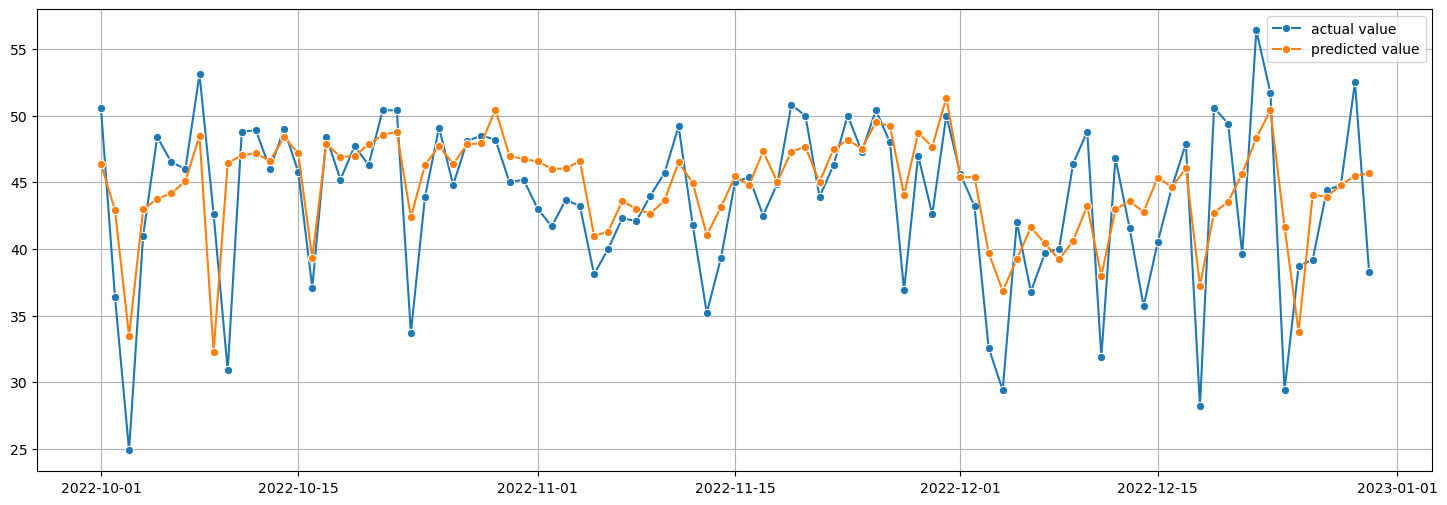

In [1751]:
pred_plot(y_test, y_pred, val_date_list)

#### 2) KNN

In [1752]:
# 선언하기
knn_model = KNeighborsRegressor()

In [1753]:
# 학습하기
knn_model.fit(x_train_s, y_train)

KNeighborsRegressor()

In [1754]:
# 하이퍼파라미터 튜닝
param = {'n_neighbors': range(2, 20)}
model = GridSearchCV(knn_model, param, cv=5, scoring='neg_mean_absolute_error')

In [1755]:
model.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 20)},
             scoring='neg_mean_absolute_error')

In [1756]:
# 중요 정보 확인
print('=' * 50)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 50)

[-5.77330973 -5.63860767 -5.50314159 -5.47711858 -5.42935693 -5.41188369
 -5.40119027 -5.39850934 -5.43831858 -5.44781657 -5.46253392 -5.47491082
 -5.50009861 -5.52025251 -5.54828761 -5.57850911 -5.59303245 -5.6270368 ]
--------------------------------------------------------------------------------
최적파라미터: {'n_neighbors': 9}
--------------------------------------------------------------------------------
최고성능: -5.398509341199607


In [1757]:
# 하이퍼파라미터 튜닝
param = {'n_neighbors': range(2, 20)}
model = GridSearchCV(knn_model, param, cv=5, scoring='neg_mean_absolute_percentage_error')

In [1758]:
model.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(2, 20)},
             scoring='neg_mean_absolute_percentage_error')

In [1759]:
# 중요 정보 확인
print('=' * 50)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 50)

[-0.14819532 -0.14486225 -0.14182251 -0.14107483 -0.13949074 -0.13917431
 -0.13915305 -0.13920031 -0.14044783 -0.14061925 -0.14122492 -0.1415287
 -0.14230867 -0.14292517 -0.14369312 -0.14456414 -0.14492593 -0.14588898]
--------------------------------------------------------------------------------
최적파라미터: {'n_neighbors': 8}
--------------------------------------------------------------------------------
최고성능: -0.13915304568968573


In [1760]:
# 예측하기
y_pred = model.predict(x_test_s)

In [1761]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3.9256868131868132
MAPE:  0.09550356863471866
R2:  0.2646108099828822


In [1762]:
maes['knn model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['knn model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['knn model\'s R2'] = r2_score(y_test, y_pred)

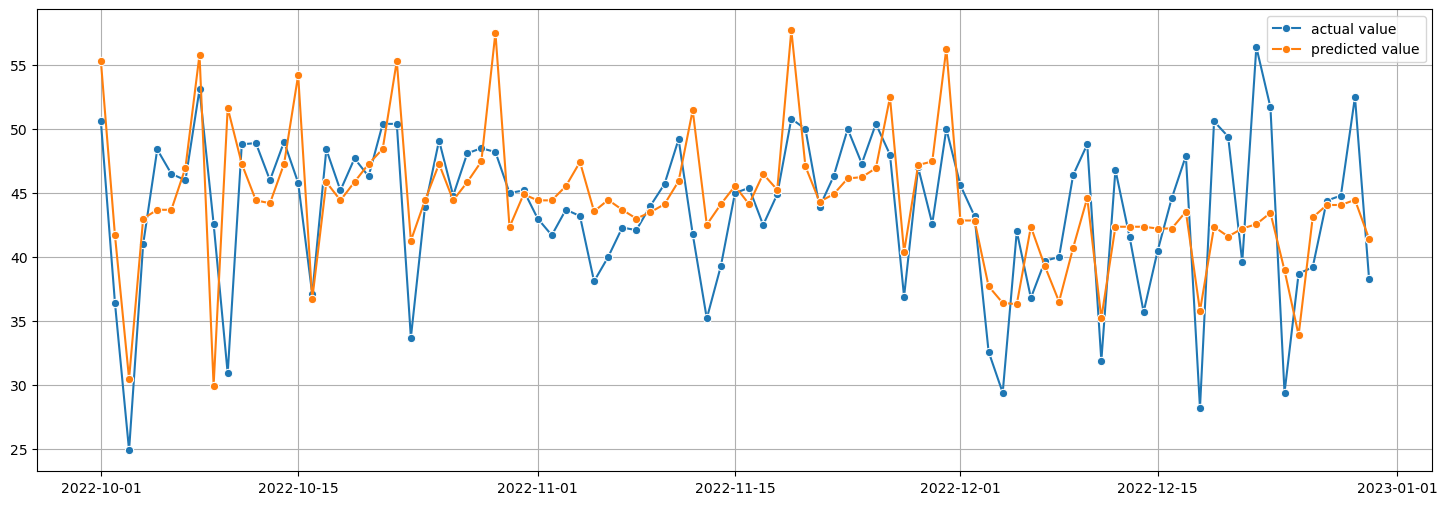

In [1763]:
pred_plot(y_test, y_pred, val_date_list)

#### 3) Decision Tree

In [1764]:
# 선언하기
tree_model = DecisionTreeRegressor(random_state=1)

In [1765]:
# 학습하기
tree_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [1766]:
# 하이퍼파라미터 튜닝
param = {'max_depth': range(1, 20)}
model = GridSearchCV(tree_model, param, cv=5, scoring='neg_mean_absolute_error')

In [1767]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 20)},
             scoring='neg_mean_absolute_error')

In [1768]:
# 중요 정보 확인
print('=' * 50)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 50)

[-9.38629957 -7.4131305  -6.76159688 -6.0613357  -5.54030586 -5.35364969
 -5.29464002 -5.34979864 -5.42737224 -5.52530007 -5.70384972 -5.68870226
 -5.74962388 -5.96417938 -5.98254204 -5.90931247 -5.92462944 -5.950838
 -6.00868278]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 7}
--------------------------------------------------------------------------------
최고성능: -5.294640016060089


In [1769]:
# 하이퍼파라미터 튜닝
param = {'max_depth': range(1, 20)}
model = GridSearchCV(tree_model, param, cv=5, scoring='neg_mean_absolute_percentage_error')

In [1770]:
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': range(1, 20)},
             scoring='neg_mean_absolute_percentage_error')

In [1771]:
# 중요 정보 확인
print('=' * 50)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 50)

[-0.25568328 -0.20669452 -0.18513639 -0.16444628 -0.14861393 -0.14238969
 -0.14131716 -0.14254117 -0.14402828 -0.14537166 -0.14935588 -0.1491617
 -0.15046473 -0.15624347 -0.1559087  -0.15495172 -0.15497547 -0.15433745
 -0.1563909 ]
--------------------------------------------------------------------------------
최적파라미터: {'max_depth': 7}
--------------------------------------------------------------------------------
최고성능: -0.14131715669150746


In [1772]:
# 예측하기
y_pred = model.predict(x_test)

In [1773]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3.9937639178731756
MAPE:  0.10158456064769938
R2:  0.11642178430335459


In [1774]:
maes['tree model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['tree model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['tree model\'s R2'] = r2_score(y_test, y_pred)

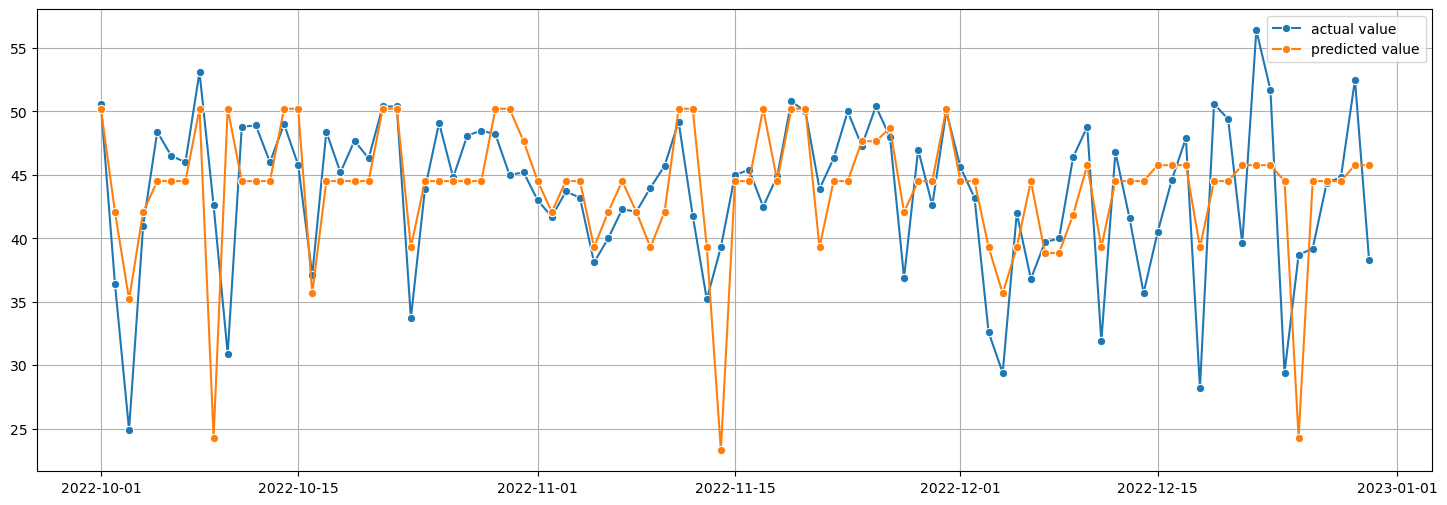

In [1775]:
pred_plot(y_test, y_pred, val_date_list)

#### 4) RandomForest

In [1776]:
# 선언하기
forest_model = RandomForestRegressor(random_state=1, max_depth=8)

In [1777]:
# 학습하기
forest_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, random_state=1)

In [1778]:
# # 하이퍼파라미터 튜닝
# param = {'max_depth': range(1, 20)}
# model = GridSearchCV(forest_model, param, cv=5, scoring='neg_mean_absolute_error')

In [1779]:
# model.fit(x_train, y_train)

In [1780]:
# # 중요 정보 확인
# print('=' * 50)
# print(model.cv_results_['mean_test_score'])
# print('-' * 80)
# print('최적파라미터:', model.best_params_)
# print('-' * 80)
# print('최고성능:', model.best_score_)
# print('=' * 50)

In [1781]:
# 예측하기
y_pred = forest_model.predict(x_test)

In [1782]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3.3730751927814406
MAPE:  0.08638354678491166
R2:  0.4092515130263198


In [1783]:
maes['forest model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['forest model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['forest model\'s R2'] = r2_score(y_test, y_pred)

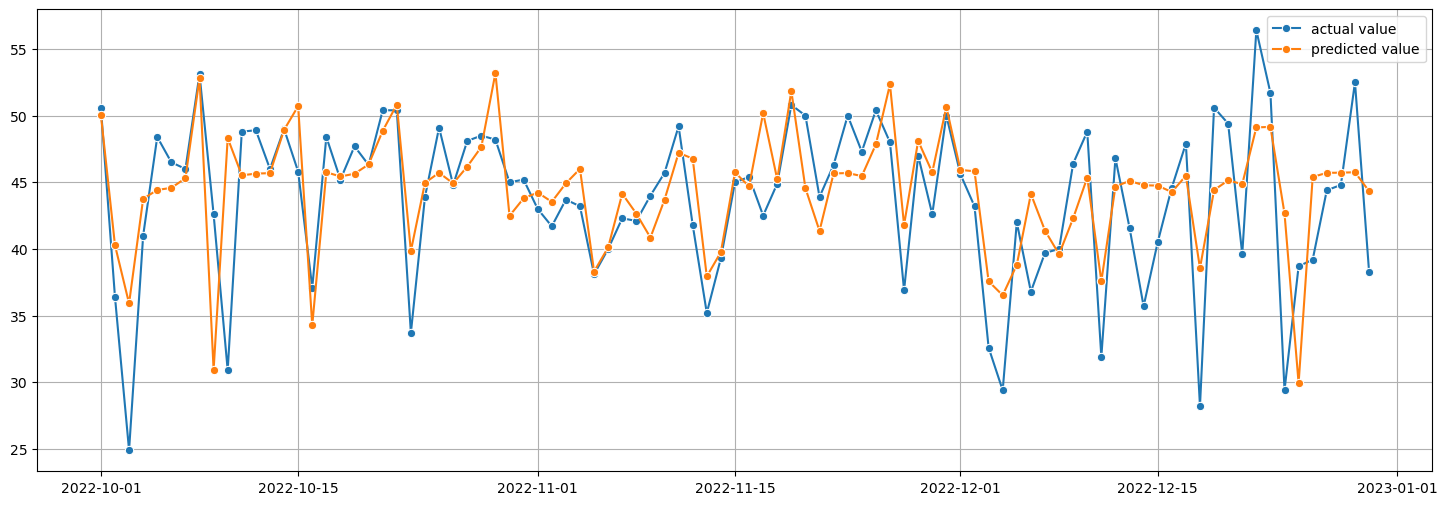

In [1784]:
pred_plot(y_test, y_pred, val_date_list)

#### 5) XGBoost

In [1785]:
# 선언하기
xgb_model = XGBRegressor(enable_categorical=True)

In [1786]:
# 학습하기
xgb_model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [1787]:
# 예측하기
y_pred = xgb_model.predict(x_test)

In [1788]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3.7156266264863063
MAPE:  0.09171482859822004
R2:  0.34846902052762097


In [1789]:
maes['xgb model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['xgb model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['xgb model\'s R2'] = r2_score(y_test, y_pred)

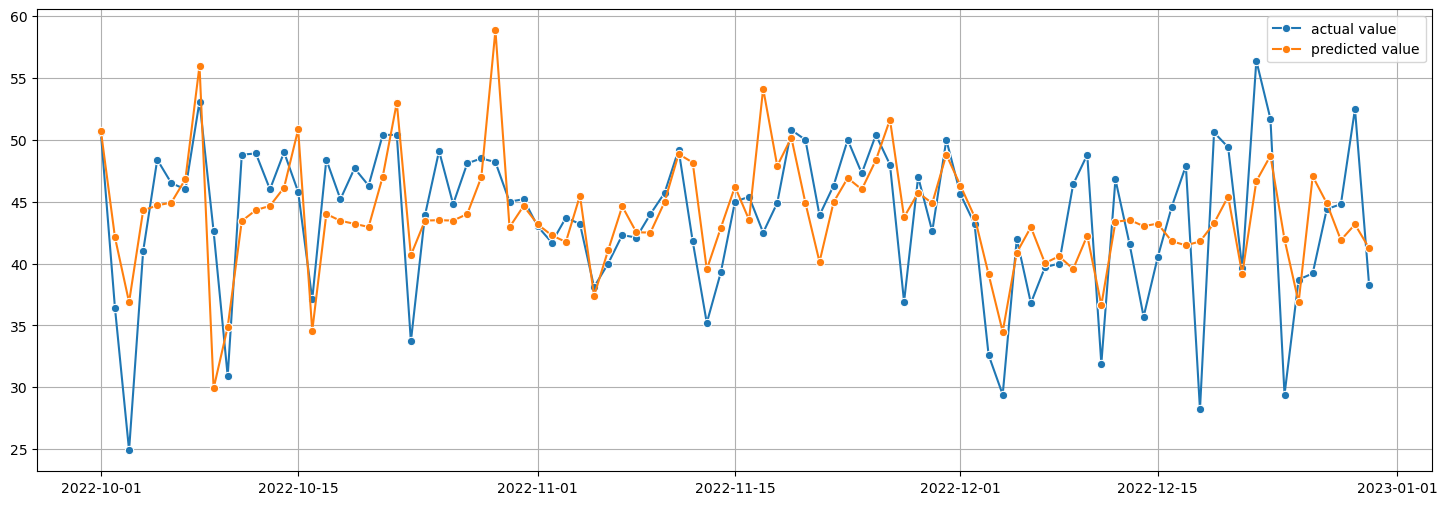

In [1790]:
pred_plot(y_test, y_pred, val_date_list)

#### 6) LightGBM

In [1791]:
# 선언하기
light_model = LGBMRegressor(random_state=1, verbose=-1, importance_type='gain')

In [1792]:
# 학습하기
light_model.fit(x_train, y_train)

LGBMRegressor(importance_type='gain', random_state=1, verbose=-1)

In [1793]:
# 예측하기
y_pred = light_model.predict(x_test)

In [1794]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  3.543803401476821
MAPE:  0.09087321762559286
R2:  0.37837553265197954


In [1795]:
maes['light model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['light model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['light model\'s R2'] = r2_score(y_test, y_pred)

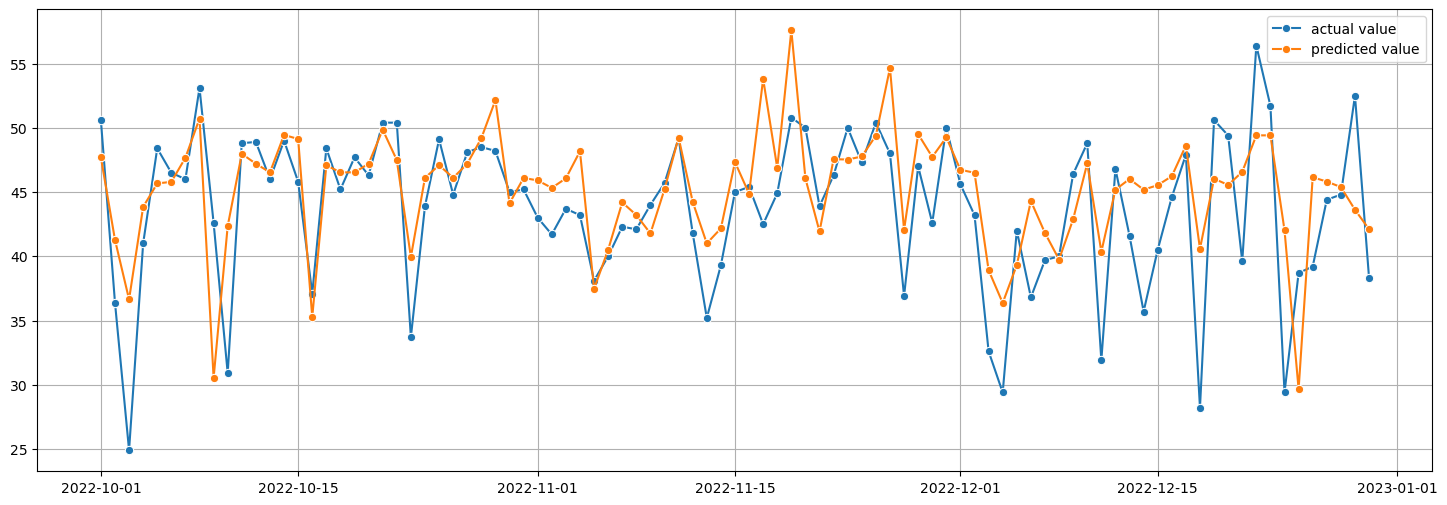

In [1796]:
pred_plot(y_test, y_pred, val_date_list)

#### 7) SVR

In [1797]:
from sklearn.svm import SVR

In [1798]:
svr_model = SVR()
svr_model.fit(x_train_s, y_train)

SVR()

In [1799]:
# 하이퍼파라미터 튜닝
param = {
    'kernel':['rbf', 'linear'],
    'gamma':['scale', 'auto'],
    'C':[1e-1, 1, 10, 100],
    'epsilon':[1e-3, 1e-2, 1e-1, 1]
}

model = GridSearchCV(svr_model, param, cv=5, scoring='neg_mean_absolute_percentage_error')

In [1800]:
model.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'epsilon': [0.001, 0.01, 0.1, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             scoring='neg_mean_absolute_percentage_error')

In [1801]:
# 중요 정보 확인
print('=' * 50)
print(model.cv_results_['mean_test_score'])
print('-' * 80)
print('최적파라미터:', model.best_params_)
print('-' * 80)
print('최고성능:', model.best_score_)
print('=' * 50)

[-0.23834301 -0.19265411 -0.28146899 -0.19265411 -0.2383693  -0.19264173
 -0.28148809 -0.19264173 -0.23839741 -0.19278792 -0.28203397 -0.19278792
 -0.23873032 -0.19318018 -0.28167652 -0.19318018 -0.1391613  -0.13453191
 -0.15136064 -0.13453191 -0.13915362 -0.13452128 -0.15137246 -0.13452128
 -0.13928198 -0.1343676  -0.15132291 -0.1343676  -0.13859242 -0.13387889
 -0.15189826 -0.13387889 -0.13386857 -0.13863908 -0.13426001 -0.13863908
 -0.1338162  -0.13857351 -0.13418636 -0.13857351 -0.13385764 -0.13855044
 -0.13404725 -0.13855044 -0.13363242 -0.13780636 -0.13375666 -0.13780636
 -0.12356045 -0.1395751  -0.13706282 -0.1395751  -0.12357789 -0.13965561
 -0.13705922 -0.13965561 -0.12368904 -0.13963309 -0.13737916 -0.13963309
 -0.12340999 -0.13913826 -0.13614166 -0.13913826]
--------------------------------------------------------------------------------
최적파라미터: {'C': 100, 'epsilon': 1, 'gamma': 'scale', 'kernel': 'rbf'}
-----------------------------------------------------------------------

In [1802]:
# 예측하기
y_pred = model.predict(x_test_s)

In [1803]:
# 평가하기
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MAE:  4.039043019265925
MAPE:  0.0992614143802806
R2:  0.15592867772684726


In [1804]:
maes['svr model\'s MAE'] = mean_absolute_error(y_test, y_pred)
mapes['svr model\'s MAPE'] = mean_absolute_percentage_error(y_test, y_pred)
r2_scores['svr model\'s R2'] = r2_score(y_test, y_pred)

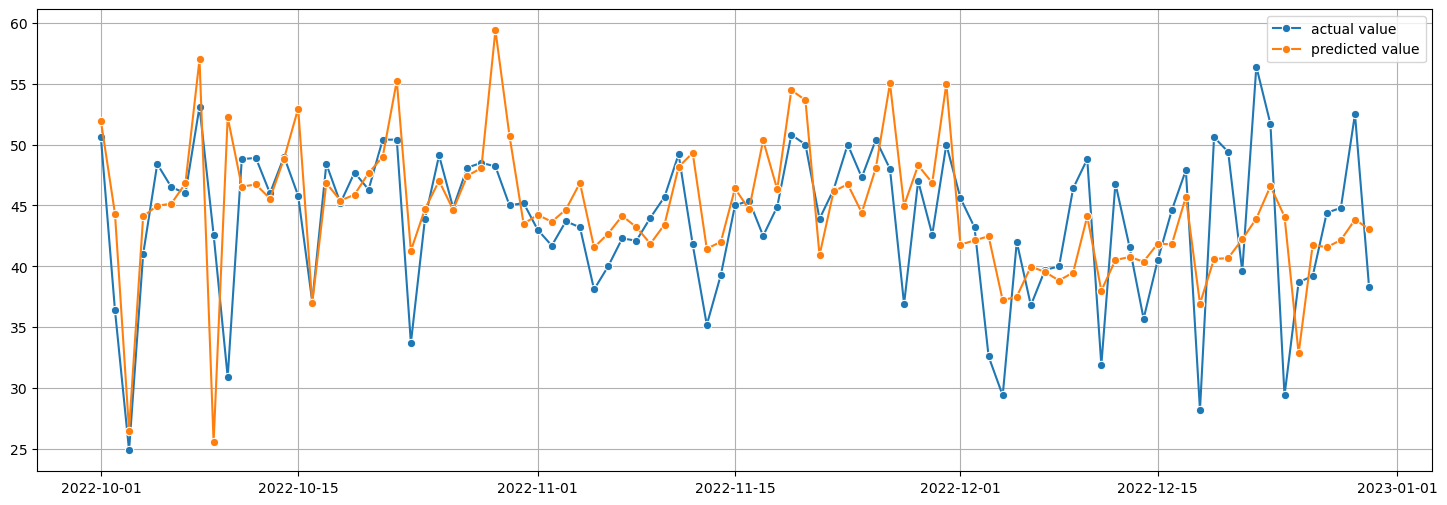

In [1805]:
pred_plot(y_test, y_pred, val_date_list)

## 3.모델별 비교
* **세부요구사항**
    * 모델링 단계에서 생성한 모든 모델의 성능을 하나로 모아서 비교합니다.
    * 가장 성능이 높은 모델을 선정합니다.

In [1806]:
sorted_maes = sorted(maes.items(), key=lambda x: x[1], reverse=False)

for model, mae in sorted_maes:
    print(f'{model}: {mae}')

forest model's MAE: 3.3730751927814406
linear model's MAE: 3.3767145651658663
light model's MAE: 3.543803401476821
xgb model's MAE: 3.7156266264863063
knn model's MAE: 3.9256868131868132
tree model's MAE: 3.9937639178731756
svr model's MAE: 4.039043019265925


In [1807]:
sorted_mapes = sorted(mapes.items(), key=lambda x: x[1], reverse=False)

for model, mape in sorted_mapes:
    print(f'{model}: {mape}')

linear model's MAPE: 0.08612313129691851
forest model's MAPE: 0.08638354678491166
light model's MAPE: 0.09087321762559286
xgb model's MAPE: 0.09171482859822004
knn model's MAPE: 0.09550356863471866
svr model's MAPE: 0.0992614143802806
tree model's MAPE: 0.10158456064769938


In [1808]:
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=False)

for model, r2_score in sorted_r2_scores:
    print(f'{model}: {r2_score}')

tree model's R2: 0.11642178430335459
svr model's R2: 0.15592867772684726
knn model's R2: 0.2646108099828822
xgb model's R2: 0.34846902052762097
light model's R2: 0.37837553265197954
forest model's R2: 0.4092515130263198
linear model's R2: 0.44573535271643927


날씨 포함
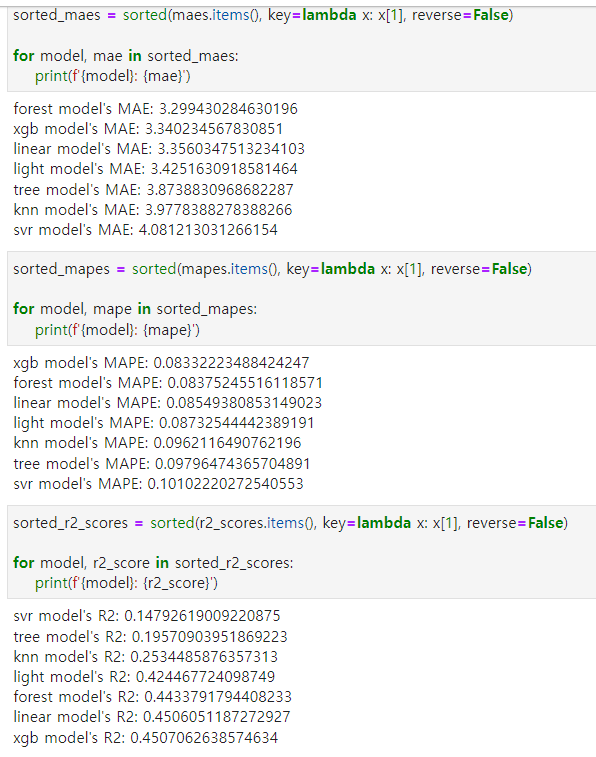

날씨 제외
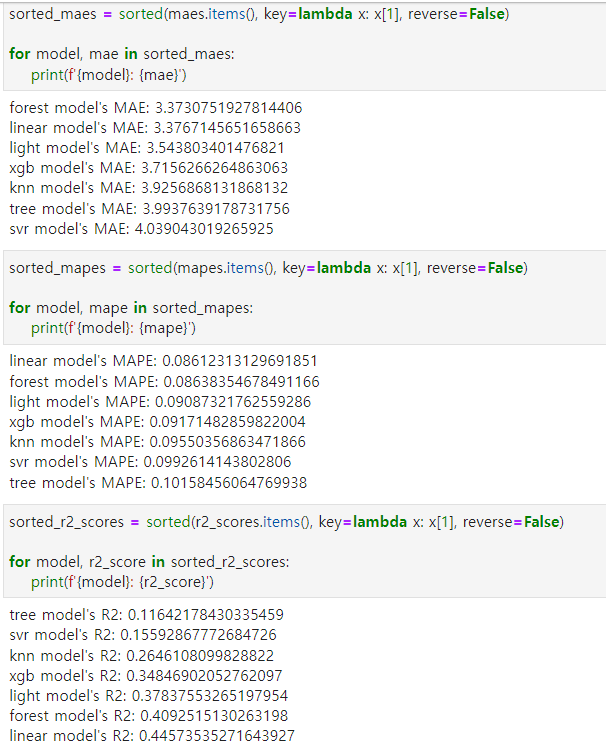